**If you lost points on the last checkpoint you can get them back by responding to TA/IA feedback**  

Update/change the relevant sections where you lost those points, make sure you respond on GitHub Issues to your TA/IA to call their attention to the changes you made here.

Please update your Timeline... no battle plan survives contact with the enemy, so make sure we understand how your plans have changed.

# COGS 108 - EDA Checkpoint

# Names

- Yasushi Oh
- Nancy Shen
- Taggert Smith
- Katelyn Villamin

# Research Question

Has the presence of PokeStops in Californian restaurants or cafes increased their traffic as measured by the frequency of Yelp check-ins? We will examine yelp check-ins frequency alongside the rate of Pokemon Go players over time, focusing on the initial release period in 2016.

## Background and Prior Work


The mobile game Pokémon Go has captivated the world since its 2016 release, drawing in millions of players who explored their surroundings through augmented reality (AR). By integrating location-based services, Pokémon Go influences real-world activities, as users seek "Pokéstops" and "Gyms" in various neighborhoods, which can, in turn, impact local businesses. The interaction between AR applications and physical businesses has become a point of interest, especially regarding how these digital engagements may affect the performance and reputation of nearby establishments. Given the sustained popularity of Pokémon Go, understanding its impact on local businesses is particularly relevant as other AR-based applications begin to emerge.
    Previous research has explored the intersection between Pokémon Go and local businesses, particularly focusing on the impact of nearby Pokéstops on restaurants' online reputations. Zhang and Zhang (2018) investigated whether the proximity to Pokéstops could enhance restaurant reviews, finding a positive correlation between nearby game locations and improved online rating suggests that the increased foot traffic from game players could translate into better business performance and online presence.
Similarly, Kondamudi et al. (2017) analyzed Yelp reviews to measure the impact of Pokémon Go on customer feedback. Their study revealed that restaurants and cafes near Pokéstops experienced a notable increase in reviews during the game's peak popularity, indicating heightened customer engagement and potentially increased sales . Zhu (2016) highlighted real-world strategies employed by restaurants to capitalize on the game's popularity, such as offering promotions to attract players. Furthermore,   Kondamud et al. (2021) and Zhang and Zhang (2021) have expanded on these findings, examining how AR games like Pokémon Go can significantly affect local businesses by increasing customer visits and sales . These insights underscomic implications of AR gaming and its potential to influence consumer behavior in the real world.

There were studies previously done with similar goals:
1. <a name="cite_note-1" href=""></a> [^](#cite_ref-1) Zhang, Y., Zhang, J. (2018) Could Nearby Pokéstops Improve Restaurants’ Online Reputation? *Hawaii International Conference on System Sciences*. https://scholarspace.manoa.hawaii.edu/server/api/core/bitstreams/748cbb5b-9718-45eb-b4ca-c5faeda1a959/content 
2. <a name="cite_note-2"></a> [^](#cite_ref-2) Kondamudi, P., Protano, B., Alhoori, H. (25 June 2017) Pokemon Go: Impact on Yelp Reviews. *Web Science Conference ‘17* https://dl.acm.org/doi/abs/10.1145/3091478.3098861
3. <a name="cite_note-3"></a> [^](#cite_ref-2) Zhang, Y., Zhang J. (30 October 2021) Catch them all: Impact of location-based augmented reality mobile applications on local businesses. *Information & Management Volume 58, Issue 8* https://www.sciencedirect.com/science/article/pii/S0378720621001245
4. <a name="cite_note-4"></a> [^](#cite_ref-2) Yehong Zhu (16 July 2016) 5 Brilliant Ways Restaurants Are Using Pokémon Go To Level Up Sales. *Forbes* https://www.forbes.com/sites/yehongzhu/2016/07/16/5-brilliant-ways-restaurants-are-using-pokemon-go-to-level-up-sales/
5. <a name="cite_note-4"></a> [^](#cite_ref-2) Pamuru, V., Khern-am-nuai, W., Kannan, Karthik (21 April 2021) The Impact of an Augmented-Reality Game on Local Business: A study of Pokemon Go on Restaurants. *Information System Research Volume 32, Issue 3*  https://pubsonline.informs.org/doi/10.1287/isre.2021.1004

# Hypothesis


We predict that PokéStops in Pokémon Go positively impact foot traffic at nearby locations, as seen by the frequency of Yelp check-ins. Since Pokémon Go saw a surge in popularity at launch, we believe that restaurants designated as PokéStops would have experienced a noticeable increase in visitors, resulting in a rise in the number of check-ins as well.

# Data

## Data overview

- Dataset #1: 
  - Dataset Name: PokéStop Coordinates
  - Link to the dataset: https://www.pogomap.info/ 
  - Number of observations: 386
  - Number of variables: 2 (latitude, longitude)
- Dataset #2: 
  - Dataset Name: Yelp Reviews: business.json
  - Link to the dataset: https://www.yelp.com/dataset/documentation/main 
  - Number of observations: 150,000
  - Number of variables: 8 - business_id, name, address, city, state, zip, latitude, longitude
- Dataset #3: 
  - Dataset Name: Yelp Reviews: checkin.json 
  - Link to the dataset: https://www.yelp.com/dataset/documentation/main 
  - Number of observations: 131,930
  - Number of Variables: 2 - business_id, date 


The first dataset includes the coordinates in terms of longitude and latitude of pokestops and pokegyms where players are more likely to visit to collect rewards. The current dataset was scraped from the link aforementioned and includes coordinates of pokestops and gyms within the downtown Los Angeles area. However, if needed, we are able to adjust the location of pokestop through our code that will scrape data from the website for pokestops and pokegyms in other locations. The data within this dataset is already cleaned as it just consists of a singular list with each pokestops coordinates. If needed, we can incorporate distinctions between pokestops and pokegyms within the dataset for further analysis on whether pokegyms or pokestops have more of a correlation with yelp reviews. 

Dataset 2 is taken from yelp’s official database and includes information on the businesses with yelp reviews, their IDs, names, addresses, and coordinates. We plan on using their addresses and coordinates to match the pokestop information from dataset 1. We’ve cleaned this dataset by querying categories that match restaurant data then querying again for restaurants that are in California. 
Dataset 3 is also taken from yelp’s official database. This dataset includes information about customer interactions with businesses. It’s composed of 2 columns: business_id, and date, where business_id is an unique identifier of each individual business and date is the date during which customers checked in or visited that business. We cleaned this dataset by merging it to the already cleaned dataset 2 using business_id’s in order to find out when customers went to a restaurant. 

We will combine these datasets as follows:
We merge Datasets #2 and #3 by business_id to create a combined dataset with business names and their check in data, and then query for businesses that identify as restaurants.
We filter the resulting dataset by coordinates to include only restaurants in our target area (likely downtown LA)
We calculate the total number of check-ins for each observation in Dataset #2 by month, for each month in our observation period, and add them as columns to each observation in the resulting dataset.
We split the resulting dataset into “Near Pokestop” restaurants and “No Pokestop” restaurants, by checking with Dataset #1 to determine whether they have a pokestop within 80m (the maximum interaction distance in Pokémon GO).


## Dataset #1 (use name instead of number here)

In [4]:
## YOUR CODE TO LOAD/CLEAN/TIDY/WRANGLE THE DATA GOES HERE
## FEEL FREE TO ADD MULTIPLE CELLS PER SECTION 

## Yelp Restaurants Check Ins

In [3]:
import pandas as pd

In [4]:
# #Load business.json and checkin.json as a pandas dataframe
# business_data = pd.read_json("\\Users\\works\\Desktop\\yelp_academic_dataset_business.json", lines=True)
# checkin_data = pd.read_json('\\Users\\works\\Desktop\\yelp_academic_dataset_checkin.json', lines=True)

#Load business.json and checkin.json as a pandas dataframe
business_data = pd.read_json('yelp_academic_dataset_business.json', lines=True)
checkin_data = pd.read_json('yelp_academic_dataset_checkin.json', lines=True)

# Use json_normalize to flatten the structure
business = pd.json_normalize(business_data.to_dict(orient="records"))
checkin = pd.json_normalize(checkin_data.to_dict(orient="records"))

#Explode the string format checkin dates into separate rows values
checkin['date'] = checkin['date'].str.split(',')
checkin =checkin.explode('date')

In [5]:
#Take only the necessary columns
business_cleaned= business[['business_id','name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude', 'categories']]

#Rename columns
business_cleaned= business_cleaned.rename(columns={'name': 'Name', 'address': 'Street Address', 'city': 'City', 'state': 'State', 'postal_code': 'Zip Code'})

#Merge businesses with the checkins
merged= pd.merge(business_cleaned, checkin, how='left', on='business_id')

#Look for businesses that are restaurants only based on categories
categories= ['Food', 'Restaurants', 'Coffee', 'Bars']
pattern= '|'.join(categories)
restaurants= merged[merged['categories'].str.contains(pattern, case=False, na=False)]

#Look for restaurants in CA only
restaurants= restaurants[restaurants['State']== 'CA']
restaurants= restaurants.rename(columns={'date':'Check-in Date'})

restaurants

,business_id,Name,Street Address,City,State,Zip Code,latitude,longitude,categories,Check-in Date
7131,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",2016-07-10 21:28:20
7132,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",2016-07-10 22:15:29
7133,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",2016-07-10 23:35:53
7134,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",2016-07-12 18:33:30
7135,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",2016-07-16 19:50:46
...,...,...,...,...,...,...,...,...,...,...
13370634,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,"Restaurants, Pizza, Food",2019-01-26 04:46:11
13370635,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,"Restaurants, Pizza, Food",2019-02-04 23:35:20
13370636,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,"Restaurants, Pizza, Food",2019-02-23 23:15:13
13370637,uriD7RFuHhLJeDdKaf0nFA,Pizza Guru,3534 State St,Santa Barbara,CA,93105,34.440689,-119.739681,"Restaurants, Pizza, Food",2019-04-07 21:37:23


# Results

## Exploratory Data Analysis

### 1. Yelp Checkins Analysis

### Check-in vs City Barplot

In order to determine the region for our focus, we want to find out which city had the highest number of check ins. To start, we filtered the original dataset to only get the count of check-ins. To visualize it, we created a bar plot of check-in counts against cities.

In [6]:
#Filter the table to find the count of Check-ins by city

#Clean Santa Barbara as there are duplicates
restaurants['City'] = restaurants['City'].replace('Santa  Barbara', 'Santa Barbara')

checkin_count= restaurants.groupby(['City'])['Check-in Date'].count().reset_index().sort_values(by= 'Check-in Date', ascending= False)
checkin_count.head()

,City,Check-in Date
5,Santa Barbara,405539
1,Goleta,79051
0,Carpinteria,27689
2,Isla Vista,20473
3,Montecito,7353


/var/folders/3g/s73_4j9s04qfhthsyfpn05580000gn/T/ipykernel_25712/230447987.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax= sns.barplot(checkin_count, x='City', y= 'Check-in Date', palette= 'pastel')
/var/folders/3g/s73_4j9s04qfhthsyfpn05580000gn/T/ipykernel_25712/230447987.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")


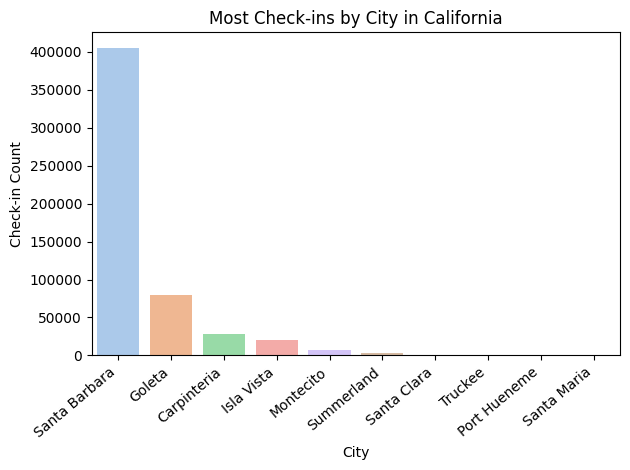

In [7]:
#Bar graph to visualize which city in California had the most check-ins
import seaborn as sns
import matplotlib.pyplot as plt


ax= sns.barplot(checkin_count, x='City', y= 'Check-in Date', palette= 'pastel')

ax.set_title("Most Check-ins by City in California")
ax.set_xlabel("City")
ax.set_ylabel("Check-in Count")

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

plt.tight_layout()
plt.show()



Here, we see that Santa Barbara had the highest number of check-ins within our timeframe. As such, we decided to put our focus for this project on this city. In order to ensure that the restaurants in our dataset is within the Santa Barbara region of Pokestops, we checked the maximum and minimum coordinates possible.

In [8]:
#load the data.json file for all the Santa Barbara Pokestop coordinates
pokestop_sb = pd.read_json('data.json')

#split the data so we can see latitude and longitude in separate columns
pokestop_sb[['latitude', 'longitude']] = pokestop_sb[0].str.split(', ', expand=True)

#remove the column that had combined latitudes and longitudes
pokestop_sb = pokestop_sb.drop(columns=0)

#convert str to float for each column
pokestop_sb['latitude'] = pokestop_sb['latitude'].astype('float64')
pokestop_sb['longitude'] = pokestop_sb['longitude'].astype('float64')

pokestop_sb.head()

,latitude,longitude
0,34.439716,-119.731118
1,34.438352,-119.712954
2,34.437364,-119.711571
3,34.437863,-119.713301
4,34.419135,-119.705338


In [9]:
#find the min and max latitudes and longitudes of Californian restuarants
min_latitude = pokestop_sb['latitude'].min()
min_longitude = pokestop_sb['longitude'].min()
max_latitude = pokestop_sb['latitude'].max()
max_longitude = pokestop_sb['longitude'].max()

print(f"min_dtsb_coords: {min_latitude}, {min_longitude}; max_dtla_coords: {max_latitude}, {max_longitude}")

min_dtsb_coords: 34.403953, -119.881242; max_dtla_coords: 34.440279, -119.510517


In [10]:
restaurants_latitude_max = restaurants['latitude'].max()
restaurants_latitude_min = restaurants['latitude'].min()
restaurants_longitude_max = restaurants['longitude'].max()
restaurants_longitude_min = restaurants['longitude'].min()


print(f"min_restaurant_coords: {restaurants_latitude_min}, {restaurants_longitude_min}; max_restaurant_coords: {restaurants_latitude_max}, {restaurants_longitude_max}")

min_restaurant_coords: 32.321229, -120.083748; max_restaurant_coords: 39.382812, -111.046396


In [11]:
#query restuarants dataframe so that it only shows restaurants within the Santa Barbara area
latitude_query = (restaurants['latitude'] >= min_latitude) & (restaurants['latitude'] <= max_latitude)
longitude_query = (restaurants['longitude'] >= min_longitude) & (restaurants['longitude'] <= max_longitude)
restaurants_sb = restaurants[ latitude_query & longitude_query]
restaurants_sb.head()

,business_id,Name,Street Address,City,State,Zip Code,latitude,longitude,categories,Check-in Date
7131,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",2016-07-10 21:28:20
7132,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",2016-07-10 22:15:29
7133,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",2016-07-10 23:35:53
7134,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",2016-07-12 18:33:30
7135,IDtLPgUrqorrpqSLdfMhZQ,Helena Avenue Bakery,"131 Anacapa St, Ste C",Santa Barbara,CA,93101,34.414445,-119.690672,"Food, Restaurants, Salad, Coffee & Tea, Breakf...",2016-07-16 19:50:46


### Check-in Trends Line Graph

To get an initial sense for our hypothesis' viability, we wanted to compare the Yelp check-in data over time for restaurants within and not within the interaction range of a pokestop. To start with, we plot the trend for all restaurants to approximately understand the general trend in the area when it comes to restaurant patronage.

In [12]:
### can change this later, for now it is easier than checking what has been imported so far
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [13]:
### can change this later, just strapped for time atm and this makes typing slightly faster
### at the end of this section, I've redefined restaurants_sb = df so y'all should be able to keep using it and ignore my little shortcut
df = restaurants_sb

# Parse 'Check-in Date' as datetime
df['Check-in Date'] = pd.to_datetime(df['Check-in Date'], format='mixed')

# See the time range of our data
print(
    'Date range:',
    df['Check-in Date'].min(),
    'to',
    df['Check-in Date'].max(),
)

Date range: 2010-01-16 20:41:45 to 2022-01-19 16:33:52


/var/folders/3g/s73_4j9s04qfhthsyfpn05580000gn/T/ipykernel_25712/2072363204.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Check-in Date'] = pd.to_datetime(df['Check-in Date'], format='mixed')


/var/folders/3w/74rrp1d550b3ctq4s54gt0zm0000gn/T/ipykernel_37827/3838447002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year-Month'] = df['Check-in Date'].dt.to_period('M')


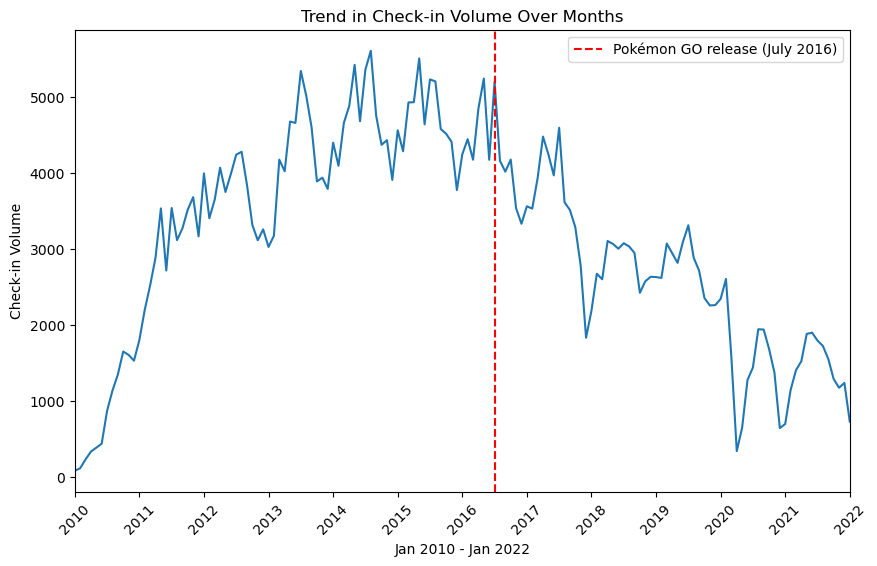

In [ ]:
# Extract year and month to create a new column for grouping
df['Year-Month'] = df['Check-in Date'].dt.to_period('M')

# Group by month and count the number of check-ins
checkins_per_month = df.groupby('Year-Month').size()

# Plot the trend over time
plt.figure(figsize=(10, 6))
checkins_per_month.plot(kind='line')

# Add a vertical line to denote PKGO release
vertical_date = pd.Period('2016-07', freq='M') 
plt.axvline(x=vertical_date, color='red', linestyle='--', label='Pokémon GO release (July 2016)')

# Set x-axis ticks to show every year
ticks = checkins_per_month.index[::12]  # Select every 12th month for yearly labels
plt.xticks(ticks=ticks, labels=[str(tick)[:4] for tick in ticks], rotation=45)

# Add title, labels, and legend
plt.title('Trend in Check-in Volume Over Months')
plt.xlabel('Jan 2010 - Jan 2022')
plt.ylabel('Check-in Volume')
plt.xticks(rotation=45)
plt.legend()

plt.show()

It seems that the overall trend in business in this area has been downward since the release of Pokémon GO, with a particularly sudden dip in early 2020 (I wonder why...)
This overall trend will be important for us to consider in our subsequent analyses of the potential affects of Pokestop proximity.

Next, we break this plot down to show the difference in trends between restaurants near pokestops and not near pokestops.

In [14]:
# We will use the Haversine formula to calculate distance
def haversine(lat1, lon1, lat2, lon2):
    """
    Calculate the great-circle distance between two points on the Earth's surface.
    Parameters are in decimal degrees.
    """
    R = 6371
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2)**2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

# Set distance threshold (in kilometers)
distance_threshold = 0.08  # 80 meters is the interaction distance in PKGO

#collect pokestop coordinates to check restaurant coordinates against
pokestops = zip(pokestop_sb['latitude'], pokestop_sb['longitude'])

# Function returns true if <80m, false otherwise
def is_near_pokestops(row, pokestops, threshold):
    for lat2, lon2 in pokestops:
        if haversine(row['latitude'], row['longitude'], lat2, lon2) <= threshold:
            return True
    return False

# Apply the function, creating a new 
df['is_near_pokestop'] = df.apply(is_near_pokestops, axis=1, pokestops=pokestops, threshold=distance_threshold)

# Split the dataframe based on proximity
near_pokestops_df = df[df['is_near_pokestop']]
far_pokestops_df = df[~df['is_near_pokestop']]

### fixing my shortcut for teammates
restaurants_sb = df

/var/folders/3g/s73_4j9s04qfhthsyfpn05580000gn/T/ipykernel_25712/4102527417.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['is_near_pokestop'] = df.apply(is_near_pokestops, axis=1, pokestops=pokestops, threshold=distance_threshold)


Let's get an initial look at our split datasets – How many restaurants have a pokestop within interaction distance? (80m)

In [15]:
print('# of restaurants with pokestops within 80m:')
print(near_pokestops_df.size)
print('# of restaurants with no pokestop within 80m:')
print(far_pokestops_df.size)

# of restaurants with pokestops within 80m:
0
# of restaurants with no pokestop within 80m:
4961396


Zero won't do. We must widen our distance so that there's enough overlap to analyze. It turns out that we need to increase it pretty significantly, due to the evident limitations of our dataset, before we start getting reasonable numbers.

In [16]:
distance_threshold = 1 # 1km

# Remove prior boolean column and apply the function again
restaurants_sb.drop(columns=['is_near_pokestop'], inplace=True)
restaurants_sb['is_near_pokestop'] = restaurants_sb.apply(is_near_pokestops, axis=1, pokestops=pokestops, threshold=distance_threshold)

/var/folders/3g/s73_4j9s04qfhthsyfpn05580000gn/T/ipykernel_25712/271324900.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants_sb.drop(columns=['is_near_pokestop'], inplace=True)
/var/folders/3g/s73_4j9s04qfhthsyfpn05580000gn/T/ipykernel_25712/271324900.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants_sb['is_near_pokestop'] = restaurants_sb.apply(is_near_pokestops, axis=1, pokestops=pokestops, threshold=distance_threshold)


In [17]:
print('# of restaurants with pokestops within 1km:')
print(near_pokestops_df.size)
print('# of restaurants with no pokestop within 1km:')
print(far_pokestops_df.size)

# of restaurants with pokestops within 1km:
0
# of restaurants with no pokestop within 1km:
4961396


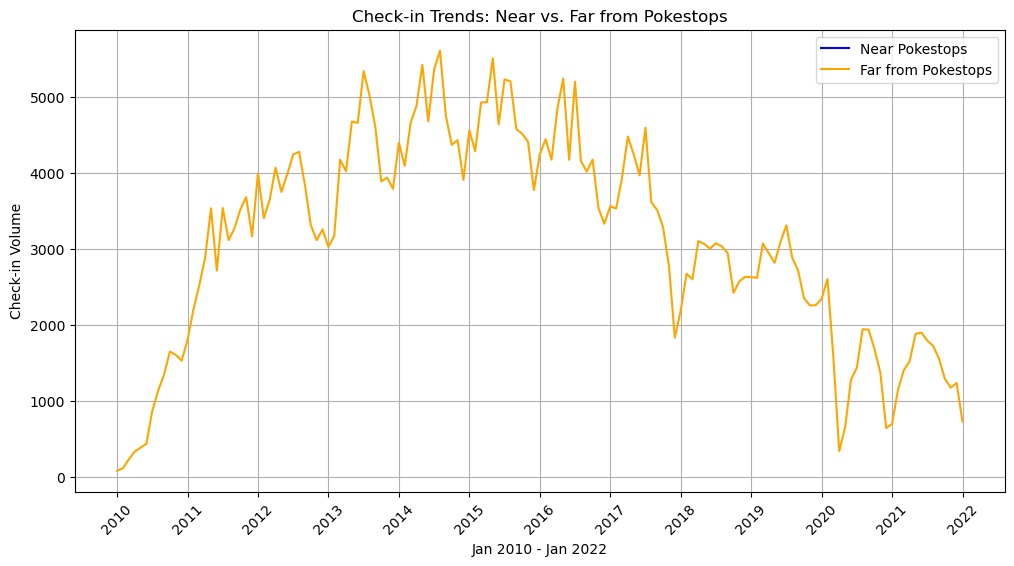

In [ ]:
# Group by month and count check-ins
near_trend = near_pokestops_df.groupby('Year-Month').size()
far_trend = far_pokestops_df.groupby('Year-Month').size()

# Plot the trends on the same graph
plt.figure(figsize=(12, 6))
plt.plot(near_trend.index.astype(str), near_trend, label='Near Pokestops', color='blue')
plt.plot(far_trend.index.astype(str), far_trend, label='Far from Pokestops', color='orange')

# Set x-axis ticks to show every year
ticks = checkins_per_month.index[::12].strftime('%Y-%m')
tick_labels = [tick[:4] for tick in ticks] 
plt.xticks(ticks=range(len(checkins_per_month.index))[::12], labels=tick_labels, rotation=45)

# Add labels, title, legend, and grid
plt.title('Check-in Trends: Near vs. Far from Pokestops')
plt.xlabel('Jan 2010 - Jan 2022')
plt.ylabel('Check-in Volume')
plt.xticks(rotation=45)
plt.grid()
plt.legend()

plt.show()

### 2. Pokestops Heat Map

Finally, to visualize the correlation between pokestops and checkins, we took in the coordinates of restaurant checkins and compared it with the coordinates of Pokestops in Santa Barbara. From here, we saw that restaurants with nearby Pokestops tended to have a higher number of check-ins compared to restaurants without Pokestops nearby.

In [2]:
!pip3 install folium


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: pip3 install --upgrade pip


In [18]:
import folium
from folium.plugins import HeatMapWithTime

# Assuming `restaurants_sb` and `pokemaps` are loaded as DataFrames
restaurants_sb['coordinates'] = list(zip(restaurants_sb['latitude'], restaurants_sb['longitude']))
grouped = restaurants_sb.groupby(['coordinates', 'Check-in Date']).size().reset_index(name='count')

# Calculate cumulative counts
grouped['cumulative_count'] = grouped.groupby('coordinates')['count'].cumsum()

# Prepare data for HeatMapWithTime
dates = sorted(grouped['Check-in Date'].unique())
heatmap_data = [
    [[lat, lon, count] for (lat, lon), count in zip(grouped[grouped['Check-in Date'] == date]['coordinates'], grouped[grouped['Check-in Date'] == date]['cumulative_count'])]
    for date in dates
]

# Create map
base_map = folium.Map(location=[34.427639, -119.711906], zoom_start=5)

# Add Pokemaps points
for _, row in pokestop_sb.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color="blue",
        fill=True,
        fill_color="blue",
        fill_opacity=0.6
    ).add_to(base_map)

# Add HeatMapWithTime
HeatMapWithTime(
    data=heatmap_data,
    radius=15,
    gradient={0.2: 'green', 0.5: 'yellow', 0.8: 'red'},
    auto_play=True,
    max_opacity=0.8
).add_to(base_map)

base_map.save("restaurants_heatmap.html")

/var/folders/3g/s73_4j9s04qfhthsyfpn05580000gn/T/ipykernel_25712/2825132121.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  restaurants_sb['coordinates'] = list(zip(restaurants_sb['latitude'], restaurants_sb['longitude']))


# Ethics & Privacy

Our proposed data does carry certain unavoidable biases. There will certainly be obscure personal biases in selecting cases to examine, which we will try to reduce by outlining an elaborate set of criteria for selecting the most representative sample of restaurants that we can while ensuring that confounding factors we can anticipate are minimized, and by having each member of our group contribute to the selection process. 

However, we are aware—thanks to prior work on Pokemon Go hotspot distributions—that PokeStops are concentrated disproportionately in areas with socioeconomically advantaged populations, making it more likely that our selected cases will be from one of those areas, and thus our findings may not be generalizable to disadvantaged populations. Additionally, by necessity our study will likely draw from areas that have experienced consistent economic success and stability, as our case studies need to have been in business since at least 2016. Moreover, our analysis will be stronger if we look at areas with less historical instability, meaning fewer confounds in our dataset. To mitigate this, we may intentionally select from various areas with different socioeconomic statuses (i.e. high traffic low income areas, low traffic low income areas, etc.) to attempt to balance out the biases in our overall dataset.

Additionally and unavoidably, due to the nature of Pokemon Go as an online AR video game, we are focused on only people with smartphones and cellular data, resulting in a selection bias. 
Some data we collect—i.e. Yelp reviews—might contain user identifiable information such as username and profile pictures. Any privacy issues can be avoided here by anonymizing our individual data. However, it will be more difficult to anonymize the establishments we look at, as their location data is relevant to our study, and our paper could have unforeseen consequences for those specific establishments. 

We will also consult prior work regarding the use of Yelp review data, such as [this paper](https://pubsonline.informs.org/doi/epdf/10.1287/mnsc.2015.2304) on Yelp review fraud, to understand the potential impacts on the results and ethics of our project.


# Team Expectations 

- Clear and timely communication through the group chat 
- Respect to the weekly deadlines and communicate beforehand if there’s any delays
- Communicate any issues that may require help from other groupmates

# Project Timeline Proposal

Specify your team's specific project timeline. An example timeline has been provided. Changes the dates, times, names, and details to fit your group's plan.

If you think you will need any special resources or training outside what we have covered in COGS 108 to solve your problem, then your proposal should state these clearly. For example, if you have selected a problem that involves implementing multiple neural networks, please state this so we can make sure you know what you’re doing and so we can point you to resources you will need to implement your project. Note that you are not required to use outside methods.



| Meeting Date  | Meeting Time| Completed Before Meeting  | Discuss at Meeting |
|---|---|---|---|
| 11/1  |  1 PM | Do background research on topic <br> 1. Shortlist of candidates for case studies based on found datasets (). <br>  2. Figuring out how to scrape yelp reviews if needed ().  <br> 3. Finding auxiliary datasets (). <br>  4. Background research on viable methodologies.  | Decide on case studies & credible datasets we will use. Discuss project scope. | 
| 11/8  |  1 PM | Compile final datasets needed | Update each other on background research done, outline project methodology, and elegate tasks to each member | 
| 11/15  | 1 PM  | Compile and import data, set up jupyter notebook  | Discuss Wrangling and possible analytical approaches; Assign group members to lead each specific part   |
| 11/22  | 1 PM  | Wrangle Data; EDA | Review/Edit wrangling/EDA; Discuss Analysis Plan |
| 11/29  | 1 PM  | Finalize wrangling/EDA; Begin Analysis | Discuss/edit Analysis; Complete project check-in |
| 12/6  | 1 PM  | Complete analysis; Draft results/conclusion/discussion (Wasp)| Discuss/edit full project |
| 12/11  | Before 11:59 PM  | NA | Turn in Final Project & Group Project Surveys |